<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product " />
</a> 


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/cc-logo-square.png" width="200" alt="cognitiveclass.ai logo" />

<h1>Test Uniform, Default and Xavier Uniform Initialization on MNIST dataset with tanh activation</h1>

<h2>Table of Contents</h2>
In this lab, you will test PyTroch Default Initialization, Xavier Initialization and Uniform Initialization on the MNIST dataset. 

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Make">Make Some Data</a></li>
    <li><a href="#Cost">Define Several Neural Network, Criterion function, Optimizer</a></li>
    <li><a href="#Train">Test Uniform, Default and Xavier Initialization</a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>

<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>

<h2>Preparation</h2>

We'll need the following libraries:  

In [1]:
## Import the libraries we need to use in this lab
import time

# Using the following line code to install the torchvision library
# !conda install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

In [2]:
print(torch.cuda.is_available())
DEV = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(DEV)

True
cuda:0


<h2 id="Model">Neural Network Module and Training Function</h2> 

Define the neural network module or class with Xavier Initialization

In [3]:
import pp.net_initializers as ppni

Define a function to train the model, in this case the function returns a Python dictionary to store the training loss and accuracy on the validation data 

In [4]:
import pp.train as ppt

<h2 id="Makeup_Data">Make Some Data</h2> 

Load the training dataset by setting the parameters <code>train </code> to <code>True</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>

In [5]:
## Create the train dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Load the testing dataset by setting the parameters <code>train</code> to <code>False</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>

In [6]:
## Create the validation dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the training-data loader and the validation-data loader object 

In [7]:
## Create Dataloader for both train dataset and validation dataset

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, 
                                           shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=5000, shuffle=False)

<!--Empty Space for separating topics-->

<h2 id="Cost">Define Neural Network, Criterion function, Optimizer and Train the Model</h2> 

Create the criterion function

In [8]:
## Define criterion function

criterion = nn.CrossEntropyLoss()

Create the model with 100 hidden layers  

In [9]:
## Set the parameters

input_dim = 28 * 28
output_dim = 10
layers = [input_dim, 100, 10, 100, 10, 100, output_dim]
epochs = 15
learning_rate = 0.01

<h2 id="Train">Test PyTorch Default Initialization, Xavier Initialization, Uniform Initialization</h2> 

Train the network using PyTorch Default Initialization

In [10]:
## Train the model with default initialization
start = time.time()

model_def = ppni.Net(layers)
model_def.to(DEV)
optimizer = torch.optim.SGD(model_def.parameters(), lr=learning_rate)
training_results_def = ppt.train(model_def, criterion, train_loader, validation_loader, 
                                 optimizer, 
                                 len(validation_dataset), 
                                 epochs=epochs)

print("elapsed time (s): ", time.time() - start)

elapsed time (s):  66.15893363952637


Train the network using Xavier Initialization function

In [11]:
## Train the model with Xavier initialization
start = time.time()

model_xavier = ppni.NetXavier(layers)
model_xavier.to(DEV)
optimizer = torch.optim.SGD(model_xavier.parameters(), lr=learning_rate)
training_results_xavier = ppt.train(model_xavier, criterion, train_loader, validation_loader, 
                                    optimizer, 
                                    len(validation_dataset), 
                                    epochs=epochs)

print("elapsed time (s): ", time.time() - start)

elapsed time (s):  64.98301267623901


Train the network using Uniform Initialization

In [13]:
## Train the model with Uniform initialization
start = time.time()

model_unif = ppni.NetUniform(layers)
model_unif.to(DEV)
optimizer = torch.optim.SGD(model_unif.parameters(), lr=learning_rate)
training_results_unif = ppt.train(model_unif, criterion, train_loader, validation_loader, 
                                  optimizer,
                                  len(validation_dataset), 
                                  epochs=epochs)

print("elapsed time (s): ", time.time() - start)

elapsed time (s):  65.15830373764038


<h2 id="Result">Analyse Results</h2> 

In [14]:
training_parms = [
  { 'results': training_results_def, 'label': 'Default'},
  { 'results': training_results_unif, 'label':  'Uniform' },
  { 'results': training_results_xavier, 'label': 'Xavier' },
]

Compare the training loss for each initialization

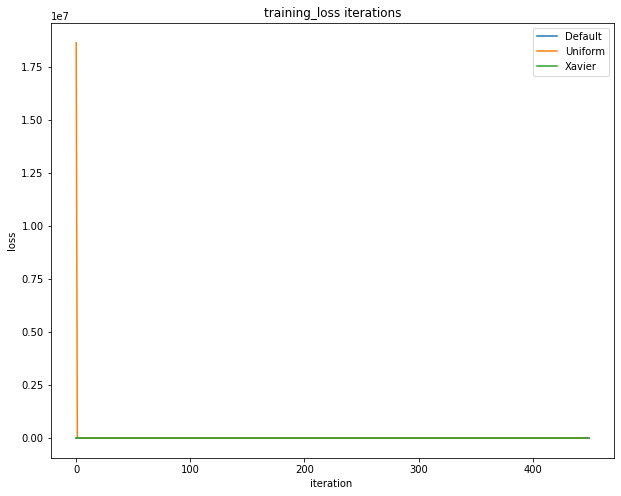

In [15]:
## Plot training loss
ppt.plot_(plt, training_parms, key='training_loss')


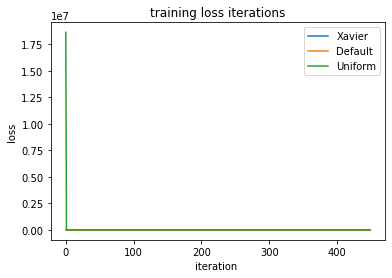

In [19]:
plt.plot(training_results_xavier['training_loss'], label='Xavier')
plt.plot(training_results_def['training_loss'], label='Default')
plt.plot(training_results_unif['training_loss'], label='Uniform')
plt.ylabel('loss')
plt.xlabel('iteration ')  
plt.title('training loss iterations')
plt.legend()

Compare the validation loss for each model  

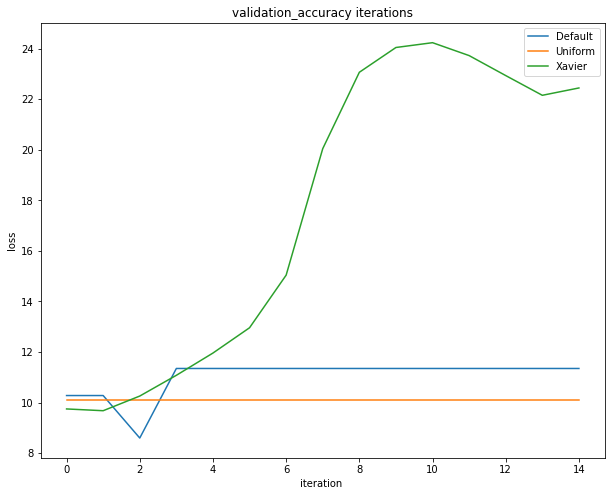

In [16]:
## Plot the validation accuracy
ppt.plot_(plt, training_parms, key='validation_accuracy')


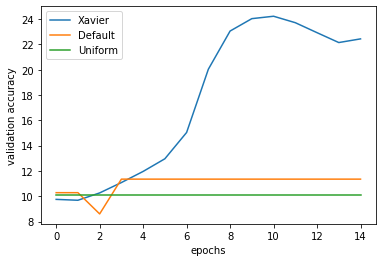

In [18]:
plt.plot(training_results_xavier['validation_accuracy'], label='Xavier')
plt.plot(training_results_def['validation_accuracy'], label='Default')
plt.plot(training_results_unif['validation_accuracy'], label='Uniform') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs')   
plt.legend()

<a href="http://cocl.us/pytorch_link_bottom">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/notebook_bottom%20.png" width="750" alt="PyTorch Bottom" />
</a>

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>

<hr>

Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.